In [6]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

In [7]:
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/anisayari/Youtube-apprendre-le-deeplearning-avec-tensorflow/blob/master/%234%20-%20CNN/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

42552061/42552061 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
\content\datasets\dataset
C:\content\datasets\dataset


In [14]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

174


In [15]:
batch_size = 3  #on fait un lot de 3 par 3 images puisqu'on a pas grande base de données
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 174 files belonging to 2 classes.
Using 140 files for training.
Found 174 files belonging to 2 classes.
Using 34 files for validation.
['pikachu', 'rondoudou']


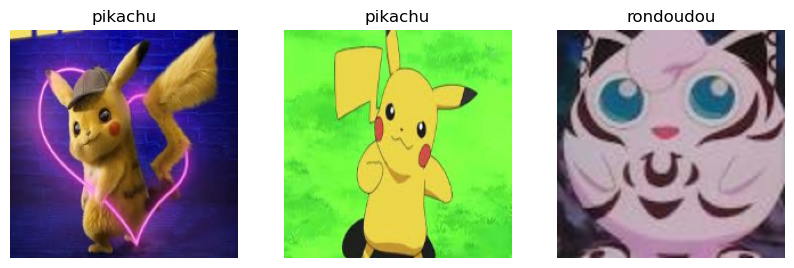

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [41]:
from tensorflow.keras import layers
#ici , on définit les couches de convolution qui sert à trouver les filtres pour décrire l'image et des couches de pooling pour 
#réduire l'image pour avoir un jeu de données plus petit et concaténée pour représenter les features plus petits.
num_classes = 2  #num de catégories
img_height = 200
img_width = 200
#image_size=(img_height, img_width)
model = tf.keras.Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255),
    
    layers.Resizing(img_height, img_width),
    layers.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

#Dans le contexte des couches de convolution, l'activation "ReLU" est appliquée élément par élément à la sortie de chaque filtre
#de convolution. Cela permet de conserver les caractéristiques importantes de l'image tout en supprimant les informations
#inutiles ou bruitées
#On a commencé par 128 neurones par exemple, et a chaque fois on diminue en divisant par 2
#layers.Flatten(): Cette couche est utilisée pour convertir les données d'entrée, qui peuvent être dans un format matriciel 
#(comme après les couches de convolution et de pooling), en un vecteur plat. Cela signifie que toutes les dimensions spatiales 
#sont aplaties en une seule dimension
#Cette ligne définit une couche dense (entièrement connectée) avec 64 neurones. Chaque neurone dans cette couche est connecté
#à chaque neurone de la couche précédente (la sortie de la couche Flatten dans ce cas).
#La fonction d'activation "ReLU" est utilisée ici, ce qui signifie que la sortie de chaque neurone est passée à travers 
#la fonction ReLU , qui est une fonction d'activation non linéaire
#permettant au réseau de modéliser des relations plus complexes entre les caractéristiques extraites par les couches précédentes.
#La fonction softmax est couramment utilisée dans les problèmes de classification multiclasse. Elle calcule la probabilité 
#que chaque classe soit la classe de sortie.


In [42]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)
#compiler le modèle de réseau neuronal avec certaines configurations spécifiées, avant de l'entraîner sur les données.
#l'optimiseur Adam, qui est un algorithme d'optimisation couramment utilisé pour entraîner les réseaux de neurones
#2eme argument:la fonction de perte utilisée pour évaluer les performances du modèle pendant l'entraînement.
# qui est couramment utilisée dans les problèmes de classification avec plusieurs classes où les étiquettes de classe sont des
#entiers. from_logits=True indique que les sorties du modèle ne sont pas normalisées par une fonction d'activation softmax 
#avant de calculer la perte.
#le dernier argument qui est une mesure de la précision du modèle sur les données d'entraînement



In [43]:
logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

TypeError: TensorBoard.__init__() got an unexpected keyword argument 'embeddings_data'

In [44]:
model.fit( 
    train_data,
    validation_data=val_data,
    epochs=20,
    #callbacks=[tensorboard_callback]
)
#on remarque que la valeur de validation accuracy est pareil que la valeur de accuracy

Epoch 1/20


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.5896 - loss: 0.6976 - val_accuracy: 0.6765 - val_loss: 0.5363
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 304ms/step - accuracy: 0.6314 - loss: 0.6036 - val_accuracy: 0.9118 - val_loss: 0.3092
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.9020 - loss: 0.2461 - val_accuracy: 0.9412 - val_loss: 0.4156
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.9589 - loss: 0.1367 - val_accuracy: 0.9412 - val_loss: 0.3873
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 305ms/step - accuracy: 0.9733 - loss: 0.1141 - val_accuracy: 0.9412 - val_loss: 0.6352
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.9761 - loss: 0.0888 - val_accuracy: 0.9118 - val_loss: 0.8325
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.8256 - loss: 0.4052 - val_accuracy: 0.8824 - val_loss: 0.5012
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.9227 - loss: 0.1893 - val_accuracy: 0.911

In [45]:
model.summary()
#pour savoir les informations sur notre réseau de neurones
#la 1ere colonne: le nom de chaque couche et son type
#la 2eme colonne montre les dimensions de sortie après le passage des données à travers chaque couche
#La 3eme colonne montre le nombre total de parametres de chaque couche

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 197, 197, 128)       │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 95, 95, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 44, 44, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 19, 19, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          83,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,664 (2.99 MB)

 Trainable params: 261,554 (1021.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 523,110 (2.00 MB)

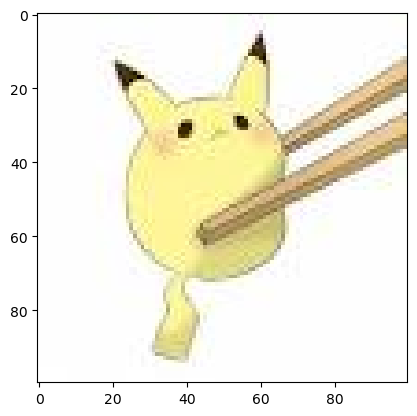

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
[[0.00104179 0.99895823]]
C'est un Pikachu !


In [79]:
# Charger l'image à prédire
file_path = r".\img1.jpg"
image_to_predict = cv2.imread(file_path, cv2.IMREAD_COLOR)

# Afficher l'image
plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
plt.show()

# Prétraiter l'image
img_to_predict = np.expand_dims(cv2.resize(image_to_predict, (200, 200)), axis=0)

# Faire la prédiction
res = model.predict(img_to_predict)
print(res)
# Obtenir l'indice de la classe prédite (indice de la probabilité maximale)
predicted_class_index = np.argmax(res)

# Afficher le résultat de la prédiction
if predicted_class_index == 1:
    #plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    #plt.show()
    print("C'est un Pikachu !")
elif predicted_class_index == 0:
    #plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    #plt.show()
    print("C'est un Rondoudou !")

    
